# <b>Avalia o comportamento da Rede</b>

In [1]:
# Importando as dependências
from quantumnet.objects import logger
from simulations import *
from copy import deepcopy
import matplotlib.pyplot as plt
logger.deactivate()

Parâmetros da Simulação

In [2]:
from simulation_parameters import *
requests = generate_traffic(request_info)
request_proactive = deepcopy(requests)
request_reactive = deepcopy(requests)
request_hybrid = deepcopy(requests)
received_requests = {}
successful_requests = {}
fulfilled_requests = {}

### <b>Preenchimento Proativo</b>

In [3]:
sim = Sim(network_info, controller_info)
sim.set_file_data_network('proativo.csv')
sim.set_file_data_requests('proativo.csv')
sim.requests = request_proactive
sim.proactive_filling(proactive_params)
sim.proactive_process_requests()
print("Tempo total:", time.current_time)
# Salva as requisições
received_requests['proativo'] = sim.requests
successful_requests['proativo'] = sim.controller.successful_requests
fulfilled_requests['proativo'] = sim.controller.fulfilled_requests
sim.end()

Tempo total: 100


### <b>Preenchimento Reativo</b>

In [4]:

# Inicializando a simulação
sim = Sim(network_info, controller_info)
sim.set_file_data_network('reativo.csv')
sim.set_file_data_requests('reativo.csv')
sim.requests = request_reactive
sim.reactive_process_requests()
print("Tempo total:", time.current_time)
# Salva as requisições
received_requests['reativo'] = sim.requests
successful_requests['reativo'] = sim.controller.successful_requests
fulfilled_requests['reativo'] = sim.controller.fulfilled_requests
sim.end()

Tempo total: 292


### <b>Preenchimento Híbrido</b>

In [5]:
# Inicializando a simulação
sim = Sim(network_info, controller_info)
sim.set_file_data_network('hibrido.csv')
sim.set_file_data_requests('hibrido.csv')
sim.requests = request_hybrid
sim.hibrid_initial_filling(proactive_params)
sim.reactive_process_requests()
print("Tempo total:", time.current_time)
# Salva as requisições
received_requests['hibrido'] = sim.requests
successful_requests['hibrido'] = sim.controller.successful_requests
fulfilled_requests['hibrido'] = sim.controller.fulfilled_requests
sim.end()

Tempo total: 282


## <b> Resultados </b>

In [12]:
import matplotlib.pyplot as plt
import csv
from matplotlib.backends.backend_pdf import PdfPages

# Configuração dos arquivos, rótulos e cores
filenames = [
    'resultados/analise_rede/proativo.csv',
    'resultados/analise_rede/reativo.csv',
    'resultados/analise_rede/hibrido.csv'
]
mode_colors = {
    "Proativo": "#ff7f0e",
    "Reativo": "#4c72b0",
    "Híbrido": "#2ca02c"
}

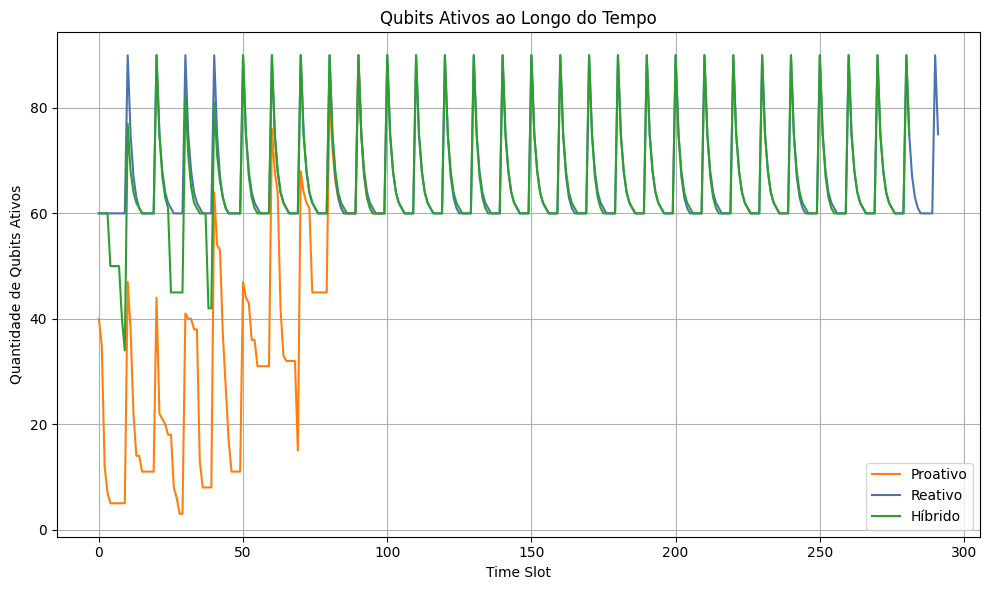

In [13]:
def plot_qubits_active_over_time(filenames, labels, output_pdf='qubits_ativos_por_tempo.pdf'):
    """
    Gera um gráfico do número de qubits ativos ao longo do tempo para diferentes modos.
    """
    plt.figure(figsize=(10, 6))

    for filename, label in zip(filenames, labels):
        time_slots = []
        qubits_active = []

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                time_slots.append(int(row["time_slot"]))
                qubits_active.append(int(row["qubits_active"]))

        # Adicionar a linha ao gráfico com a cor associada ao modo
        color = mode_colors.get(label, "#000000")  # Cor padrão caso o label não exista no dicionário
        plt.plot(time_slots, qubits_active, linestyle="-", color=color, label=label)

    # Configurações do gráfico
    plt.title("Qubits Ativos ao Longo do Tempo")
    plt.xlabel("Time Slot")
    plt.ylabel("Quantidade de Qubits Ativos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # Salvar o gráfico em um PDF
    with PdfPages(output_pdf) as pdf:
        pdf.savefig()  # Salva o gráfico no PDF
    
    plt.show()

# Exemplo de chamada
labels = ["Proativo", "Reativo", "Híbrido"]

plot_qubits_active_over_time(filenames, labels)

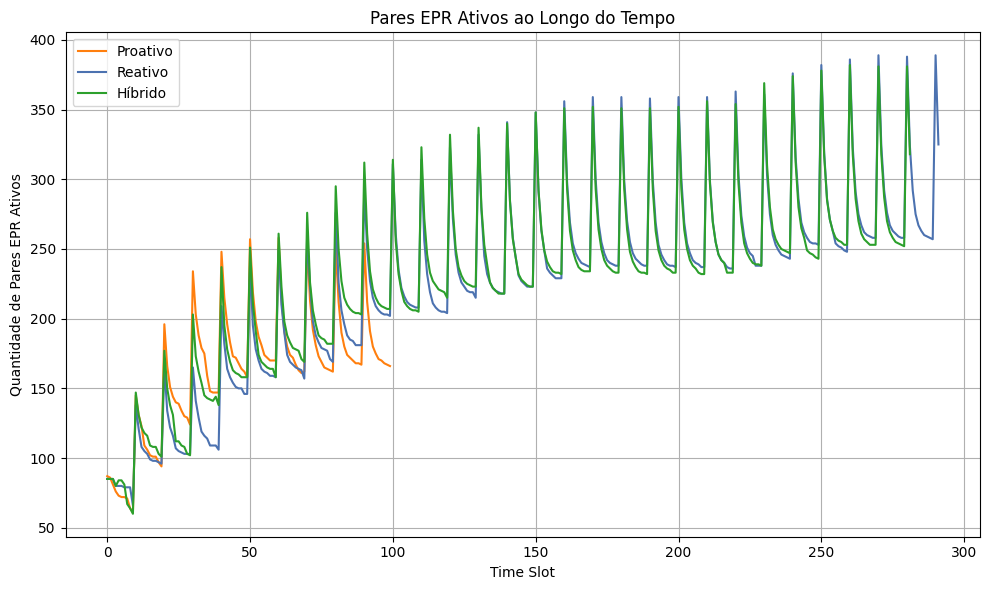

In [14]:
def plot_eprs_active_over_time(filenames, labels, output_pdf='eprs_ativos_por_tempo.pdf'):
    """
    Gera um gráfico do número de pares EPR ativos ao longo do tempo para diferentes modos.
    """
    plt.figure(figsize=(10, 6))

    for filename, label in zip(filenames, labels):
        time_slots = []
        eprs_active = []

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                time_slots.append(int(row["time_slot"]))
                eprs_active.append(int(row["eprs_active"]))

        # Adicionar a linha ao gráfico com a cor associada ao modo
        color = mode_colors.get(label, "#000000")  # Cor padrão caso o label não exista no dicionário
        plt.plot(time_slots, eprs_active, linestyle="-", color=color, label=label)

    # Configurações do gráfico
    plt.title("Pares EPR Ativos ao Longo do Tempo")
    plt.xlabel("Time Slot")
    plt.ylabel("Quantidade de Pares EPR Ativos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # Salvar o gráfico em um arquivo PDF
    with PdfPages(output_pdf) as pdf:
        pdf.savefig()  # Salva o gráfico no PDF
    
    plt.show()

plot_eprs_active_over_time(filenames, labels)

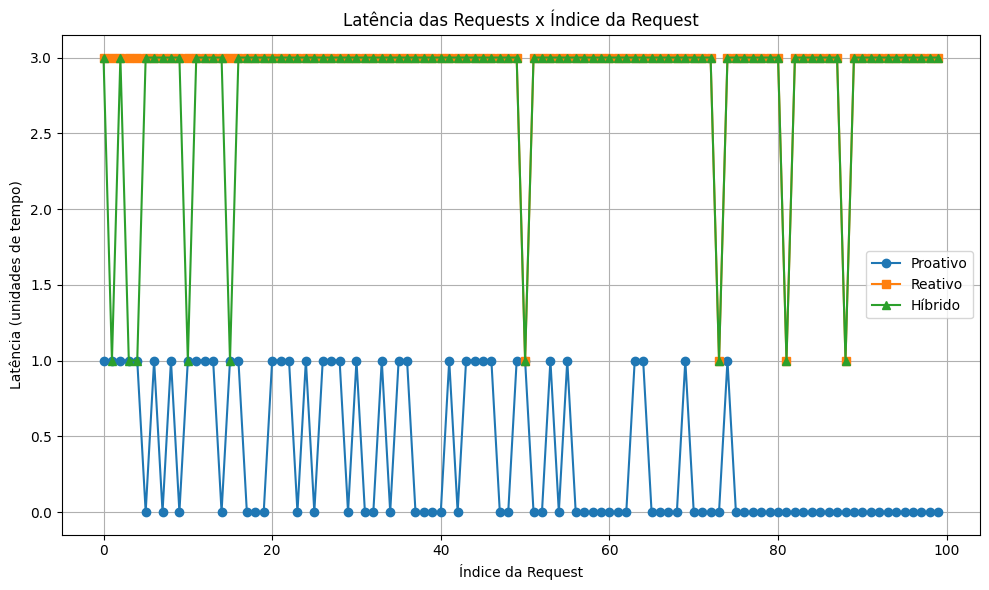

In [9]:
def plotar_latencia_requests(arquivo_proativo, arquivo_reativo, arquivo_hibrido):
    """
    Plota um gráfico comparando a latência das requests nos modos proativo, reativo e híbrido.

    Args:
        arquivo_proativo (str): Caminho para o arquivo CSV do modo proativo.
        arquivo_reativo (str): Caminho para o arquivo CSV do modo reativo.
        arquivo_hibrido (str): Caminho para o arquivo CSV do modo híbrido.
    """
    # Função auxiliar para carregar latências de um arquivo
    def carregar_latencias(arquivo):
        indices = []
        latencias = []
        with open(arquivo, mode='r', encoding='utf-8') as csvfile:
            leitor = csv.DictReader(csvfile)
            for i, linha in enumerate(leitor):
                indices.append(i)  # Índice da request
                latencias.append(float(linha["latency"]))  # Latência da request
        return indices, latencias

    # Carregar os dados dos arquivos
    indices_proativo, latencias_proativo = carregar_latencias(arquivo_proativo)
    indices_reativo, latencias_reativo = carregar_latencias(arquivo_reativo)
    indices_hibrido, latencias_hibrido = carregar_latencias(arquivo_hibrido)

    # Plotar os dados
    plt.figure(figsize=(10, 6))
    plt.plot(indices_proativo, latencias_proativo, label="Proativo", marker='o')
    plt.plot(indices_reativo, latencias_reativo, label="Reativo", marker='s')
    plt.plot(indices_hibrido, latencias_hibrido, label="Híbrido", marker='^')

    # Configurar o gráfico
    plt.title("Latência das Requests x Índice da Request")
    plt.xlabel("Índice da Request")
    plt.ylabel("Latência (unidades de tempo)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()
    
plotar_latencia_requests('resultados/analise_requests/proativo.csv', 'resultados/analise_requests/reativo.csv', 'resultados/analise_requests/hibrido.csv')


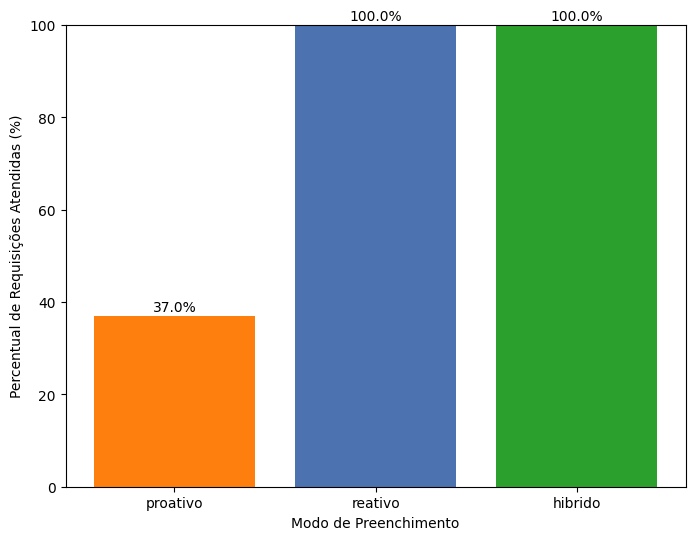

In [15]:
def calcular_e_plotar_percentual_atendimento(requisicoes_recebidas, requisicoes_atendidas, colors, output_pdf='percentual_atendimento.pdf'):
    """
    Calcula o percentual de atendimento por modo e plota um gráfico de barras.
    
    Args:
        requisicoes_recebidas (dict): Dicionário com os modos como chave e listas de requisições recebidas como valores.
        requisicoes_atendidas (dict): Dicionário com os modos como chave e listas de requisições atendidas como valores.
    """
    # Cálculo do percentual de atendimento por modo
    percentual_atendido = {}
    for modo in requisicoes_recebidas:
        total_recebidas = len(requisicoes_recebidas[modo])
        total_atendidas = len(requisicoes_atendidas[modo])
        percentual_atendido[modo] = (total_atendidas / total_recebidas) * 100 if total_recebidas > 0 else 0

    # Plotagem do gráfico
    plt.figure(figsize=(8, 6))
    
    # Plotando as barras
    plt.bar(percentual_atendido.keys(), percentual_atendido.values(), color=colors)
    
    plt.xlabel('Modo de Preenchimento')
    plt.ylabel('Percentual de Requisições Atendidas (%)')
    plt.ylim(0, 100)

    # Exibe o valor de cada barra
    for i, v in enumerate(percentual_atendido.values()):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center')

    # Salvar o gráfico em um PDF
    with PdfPages(output_pdf) as pdf:
        pdf.savefig()  # Salva o gráfico no PDF
        
    # Exibe o gráfico
    plt.show()

calcular_e_plotar_percentual_atendimento(received_requests, successful_requests, colors)